# 연구문제(2023년 자료를 중심으로)

 1. (탐색적 분석) 자치구별 범죄유형 발생 건수는 어떻게 되는가?

   - 자치구별 범죄유형에서 빈도와 분포는 어떠하며 차이를 보이는가?

 2. (예측)

   - 향후 자치구별 범죄유형 발생률의 예상하면 어떠한가?

  ** 데이터 출처 : KOSIS 국가정보데이터포털

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 그래프의 한글 깨짐 처리
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
file_path = r"D:\seoul\EXPL\통계자료.xlsx"
seoul = pd.read_excel(file_path)#, header=[0, 1, 2]) 
# 데이터 확인 (앞부분 5행 출력)
print(seoul.shape)
seoul.head()

(48, 26)


,범죄유형,종로,중구,용산,성동,광진,동대문,중랑,성북,강북,...,강서,구로,금천,영등포,동작,관악,서초,강남,송파,강동
0,Larceny,1174,1526,987,891,1619,1280,1404,983,919,...,1790,1636,983,1858,1189,2003,1944,2484,2415,1677
1,Stolen Property,12,4,1,-,5,1,2,1,3,...,2,1,-,4,-,2,2,2,6,3
2,Fraud,2064,2112,1673,1866,2097,2094,2019,2231,1764,...,2927,2120,1866,3085,1744,4235,4359,8284,3834,2153
3,Embezzlement,826,825,512,545,751,913,487,419,296,...,711,710,437,1078,586,856,1188,1929,1187,454
4,Breach of Trust,36,44,39,32,24,31,10,17,15,...,41,23,29,62,23,22,291,268,68,23


In [4]:
# seoul_df = df.xs("Seoul", axis=1, level=1)   # level=1이 도시
print("서울 자치구 목록:", list(seoul.columns))

서울 자치구 목록: ['범죄유형', '종로', '중구', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북', '도봉', '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작', '관악', '서초', '강남', '송파', '강동']


                                                    빈도  백분율(%)
범죄유형                                                          
Larceny                                              1    2.08
Stolen Property                                      1    2.08
Fraud                                                1    2.08
Embezzlement                                         1    2.08
Breach of Trust                                      1    2.08
Destruction                                          1    2.08
Murder                                               1    2.08
Robbery                                              1    2.08
Setting Fire                                         1    2.08
Sexual violence                                      1    2.08
Violence                                             1    2.08
Injury                                               1    2.08
Intimidation                                         1    2.08
Extortion                                            1 

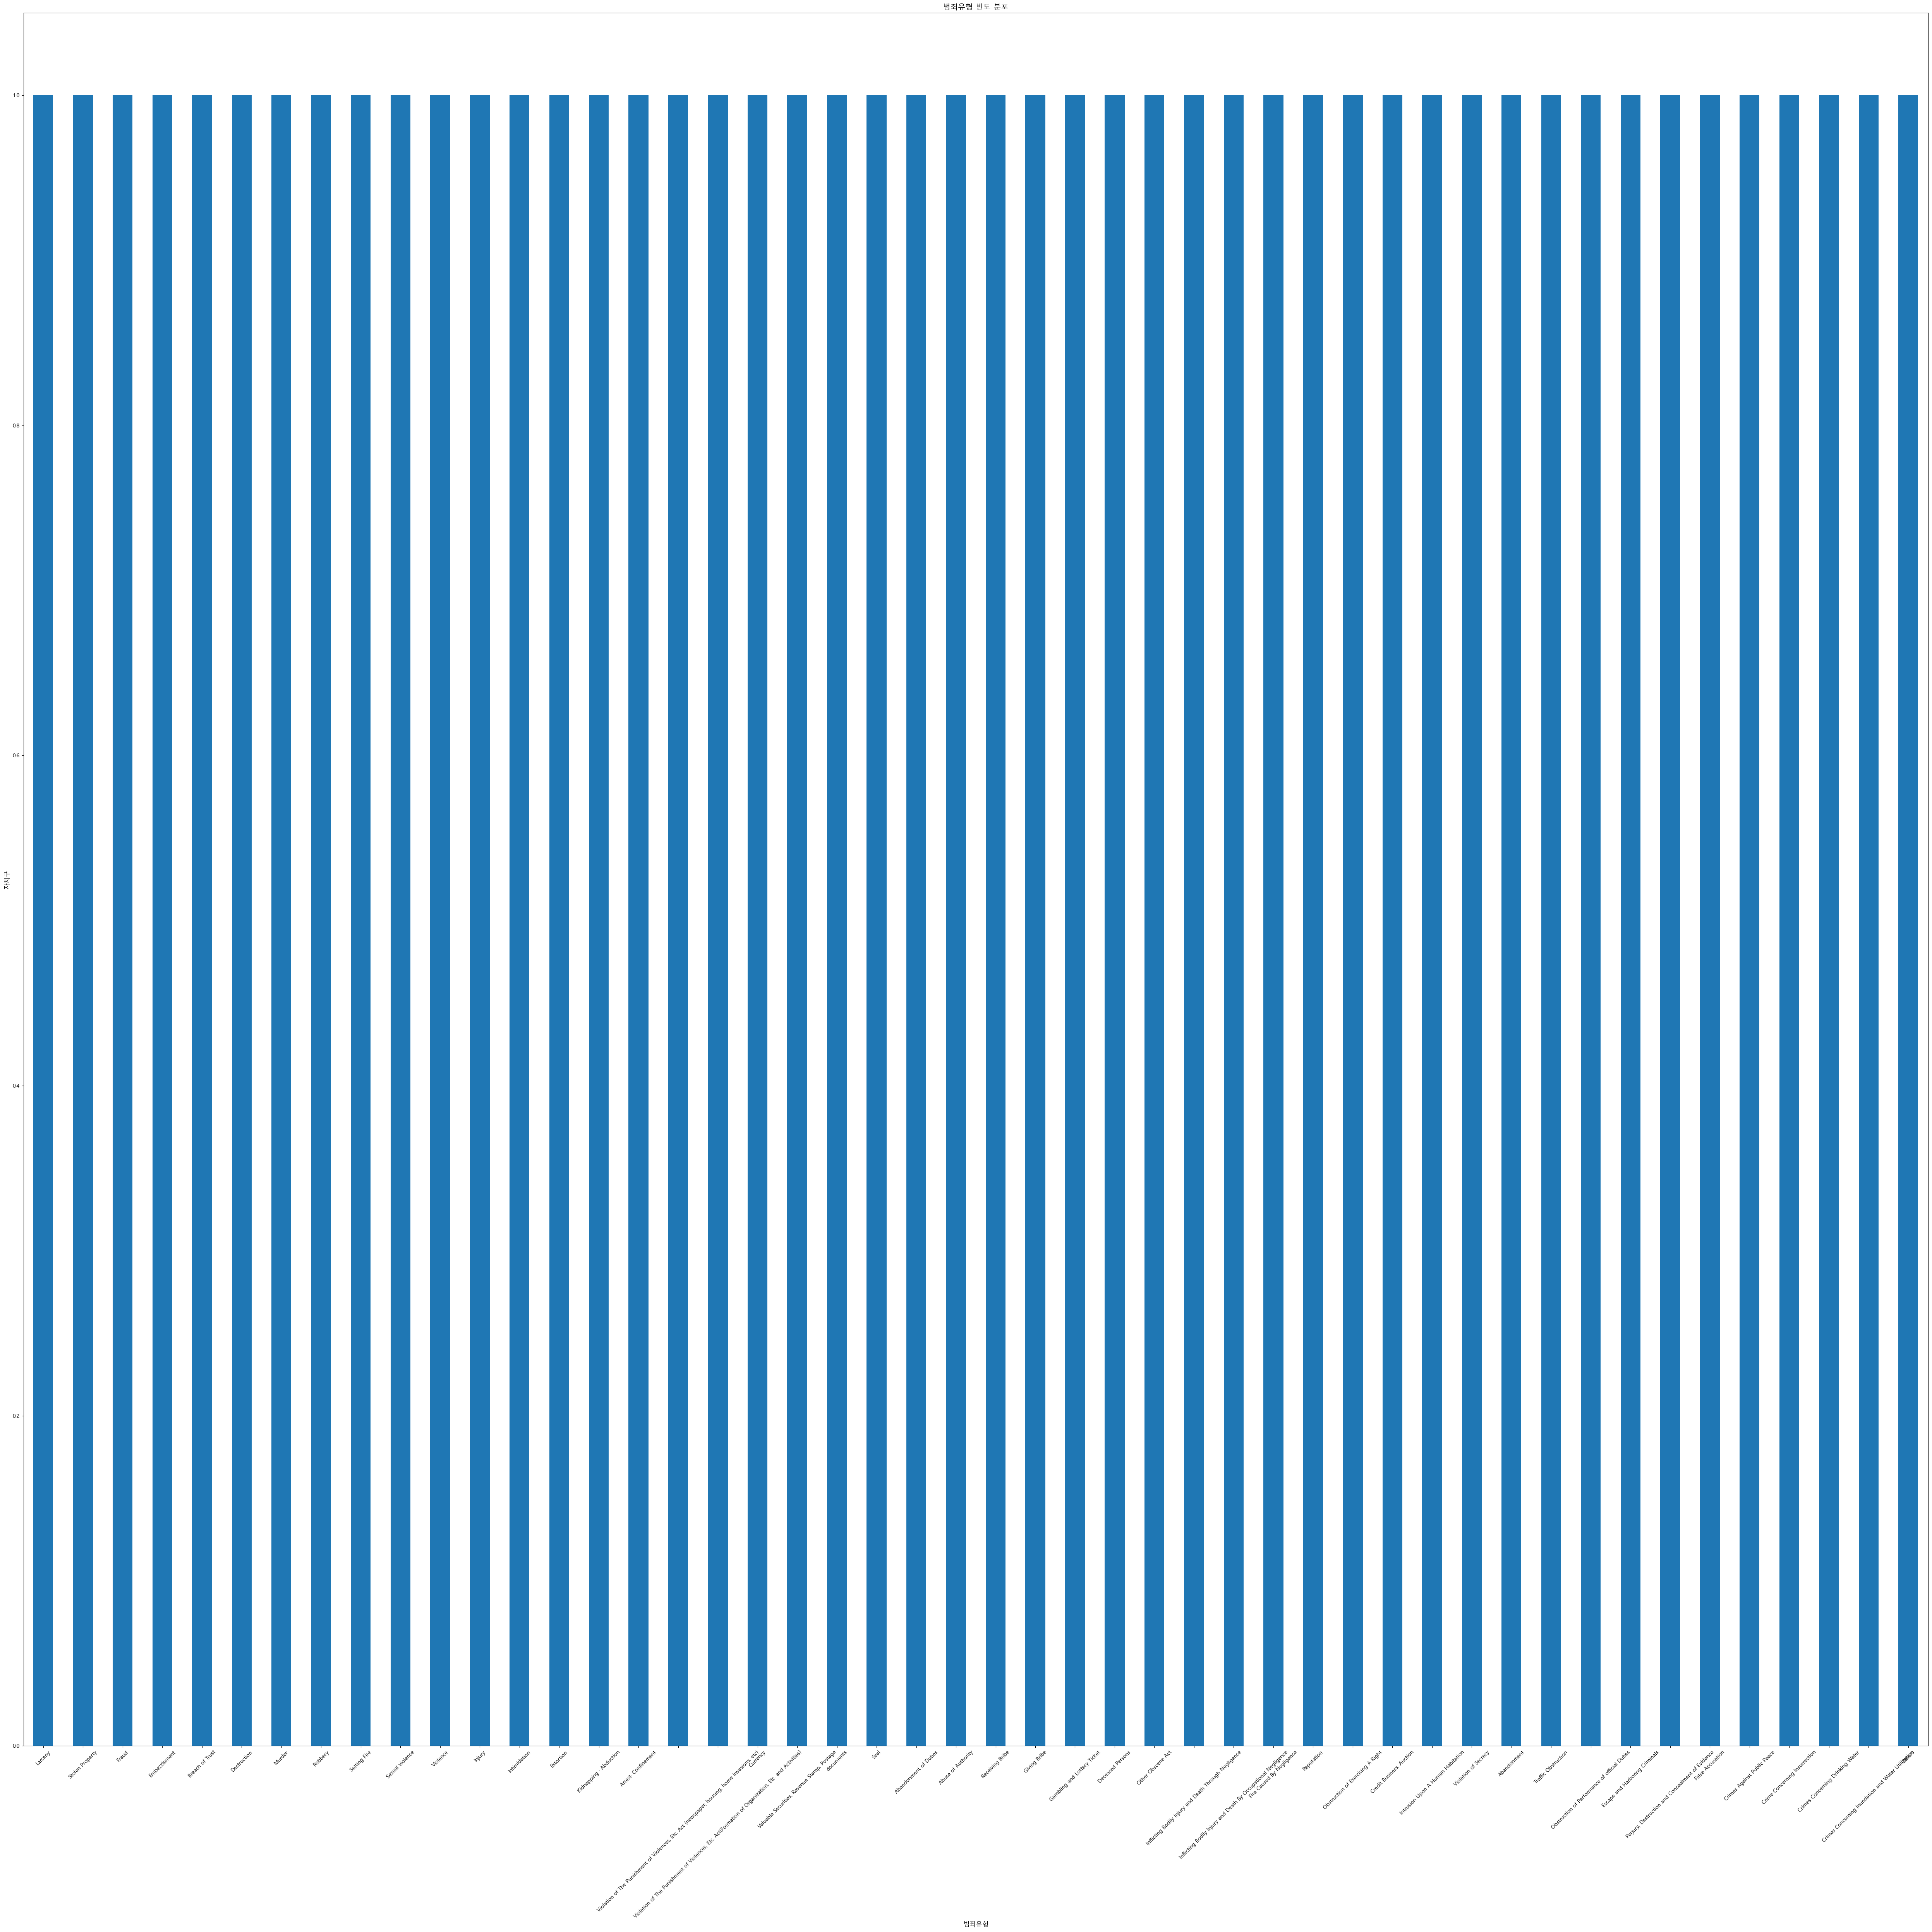

In [5]:
freq = seoul['범죄유형'].value_counts()

# 백분율 계산
percent = seoul['범죄유형'].value_counts(normalize=True) * 100

# 결과 합치기
result = pd.DataFrame({'빈도': freq, '백분율(%)': percent.round(2)})
print(result)

# 빈도 기준 막대그래프 그리기
plt.figure(figsize=(50, 50))
freq.plot(kind='bar')

plt.title('범죄유형 빈도 분포', fontsize=14)
plt.xlabel('범죄유형', fontsize=12)
plt.ylabel('자치구', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
seoul_df = seoul.filter(like="Seoul_", axis=1)
print("서울 자치구 목록:", list(seoul_df.columns))

df = pd.read_excel(file_path, header=[0,1,2])

# 컬럼명을 "범죄유형_도시_자치구" 형식으로 합치기
df.columns = ['_'.join([str(x) for x in col if str(x) != 'nan']) for col in df.columns]

print(df.columns[:20]) 

서울 자치구 목록: []
Index(['범죄유형_Larceny_Stolen Property', '종로_1174_12', '중구_1526_4', '용산_987_1',
       '성동_891_-', '광진_1619_5', '동대문_1280_1', '중랑_1404_2', '성북_983_1',
       '강북_919_3', '도봉_1005_1', '노원_1631_2', '은평_1610_2', '서대문_1190_-',
       '마포_1479_1', '양천_1409_-', '강서_1790_2', '구로_1636_1', '금천_983_-',
       '영등포_1858_4'],
      dtype='object')



[서울 Top10 범죄유형 (총합 기준)]
type3
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
10    0.0
13    0.0
17    0.0
18    0.0
dtype: float64

[서울 자치구별 Top10 범죄유형 비교표]
Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5, 6, 10, 13, 17, 18]


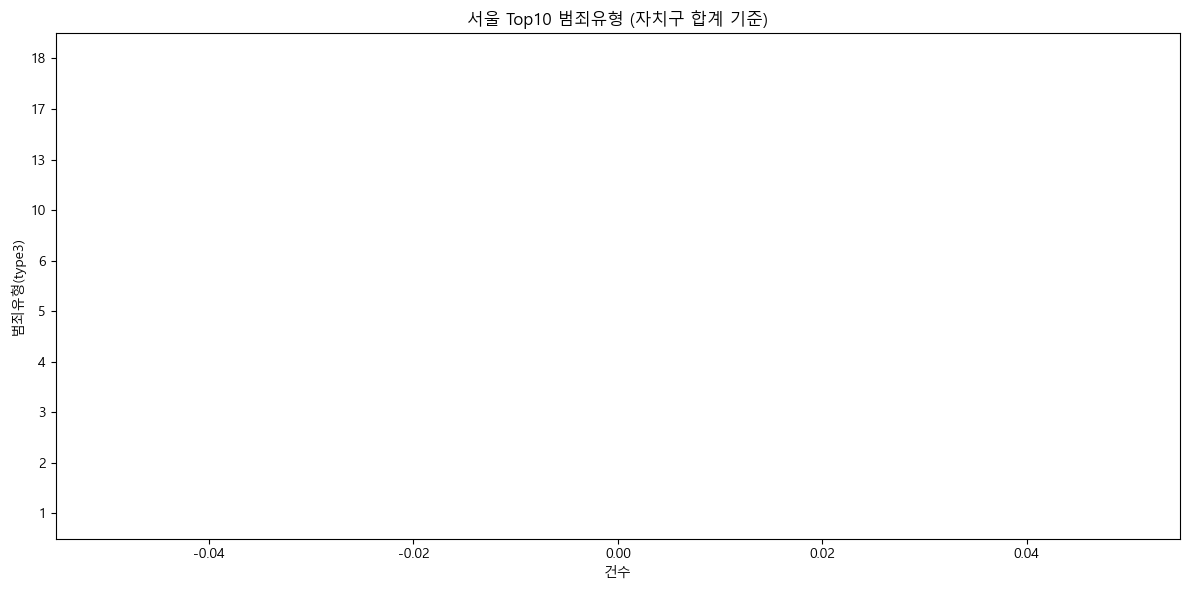

In [8]:
# 1) 데이터 불러오기: 앞 3개 행을 컬럼으로 사용 (MultiIndex)
file_path = 'D:/seoul/EXPL/통계자료.xlsx'  # 실제 경로로 수정
df = pd.read_excel(file_path, header=[0, 1, 2])

# 2) 컬럼 평탄화: ('A','B','C') -> 'A|B|C' 형태로
df.columns = [
    "|".join([str(x) for x in col if str(x) != "nan"]) if isinstance(col, tuple) else str(col)
    for col in df.columns
]

# 3) 범죄유형(왼쪽 3개 열) 이름 정리
#   ※ 원본에는 보통 'By Crime Type(1)/(2)/(3)' 같은 열이 3개 존재
type_cols = [c for c in df.columns if c.startswith("By Crime Type")]
# 혹시 영문 헤더가 다르게 들어온 경우를 대비해 보완:
if len(type_cols) < 3:
    # 대안: 컬럼 이름에 'Crime Type' 텍스트가 들어간 것들 우선
    type_cols = [c for c in df.columns if "Crime Type" in c][:3]
# 최종 안전장치: 앞쪽 3개 열을 타입열로 본다
if len(type_cols) < 3:
    type_cols = df.columns[:3].tolist()

type1, type2, type3 = type_cols[:3]
df = df.rename(columns={type1: "type1", type2: "type2", type3: "type3"})

# 4) 서울 자치구 컬럼만 선택
#    (원본 구조는 '연도|Seoul|자치구' 형태일 확률이 높음 → 'Seoul|' 포함 컬럼 필터)
seoul_cols = [c for c in df.columns if "Seoul|" in c]
seoul_df = df[seoul_cols].copy()

# 5) 자치구 이름 추출: '...|Seoul|Jongno' → 'Jongno'
def extract_district(colname: str) -> str:
    parts = colname.split("|")
    # 보통 [연도, 도시, 자치구] 구조 → 마지막 요소가 자치구
    return parts[-1]

seoul_df.columns = [extract_district(c) for c in seoul_df.columns]

# 6) 범죄유형별(소분류: type3) 집계
#    행 단위가 세부 범죄 항목(예: Larceny 등)이므로 같은 type3가 여러 행이면 합산
by_type3 = seoul_df.join(df[["type3"]]).groupby("type3", as_index=True).sum()

# 7) 서울 전체 기준 Top10 범죄유형
top10_types = by_type3.sum(axis=1).sort_values(ascending=False).head(10)
print("\n[서울 Top10 범죄유형 (총합 기준)]")
print(top10_types)

# 8) 자치구별 Top10 범죄유형 비교표 (행: 범죄유형, 열: 자치구, 값: 건수)
comparison_top10 = by_type3.loc[top10_types.index].sort_index()
print("\n[서울 자치구별 Top10 범죄유형 비교표]")
print(comparison_top10)

# 9) 시각화: Top10 범죄유형의 '서울 전체 합계' 막대그래프
plt.figure(figsize=(12, 6))
(top10_types.sort_values(ascending=True)).plot(kind="barh")
plt.title("서울 Top10 범죄유형 (자치구 합계 기준)")
plt.xlabel("건수")
plt.ylabel("범죄유형(type3)")
plt.tight_layout()
plt.show()

In [9]:
print(type(df.columns))
print(df.columns[:10])

<class 'pandas.core.indexes.base.Index'>
Index(['type1', 'type2', 'type3', '용산|987|1', '성동|891|-', '광진|1619|5',
       '동대문|1280|1', '중랑|1404|2', '성북|983|1', '강북|919|3'],
      dtype='object')


In [10]:
seoul_df = df.filter(like="Seoul", axis=1)   # "Seoul_" 포함된 컬럼만 추출
print("서울 자치구 목록:", list(seoul_df.columns))

서울 자치구 목록: []


In [12]:
df.columns = [
    "|".join([str(x) for x in col if str(x) != "nan"]) if isinstance(col, tuple) else str(col)
    for col in df.columns
]

In [13]:
crime_type_col = None
for c in df.columns:
    if "Crime Type" in c or "범죄" in c:
        crime_type_col = c
        break

In [14]:
df = df.rename(columns={crime_type_col: "범죄유형"})

In [15]:
# 4. 서울 자치구별 데이터 추출 (예: 'Seoul|'이 들어간 컬럼)
# ----------------------------
seoul_cols = [c for c in df.columns if "Seoul|" in c]
seoul_df = df[seoul_cols].copy()

# 자치구명 추출 ('Seoul|Jongno' → 'Jongno')
seoul_df.columns = [c.split("|")[-1] for c in seoul_df.columns]

# ----------------------------
# 5. 범죄유형별 합계 구하기
# ----------------------------
crime_summary = seoul_df.join(df[["범죄유형"]]).groupby("범죄유형").sum()

# ----------------------------
# 6. 서울 전체 기준 Top10 범죄유형
# ----------------------------
top10_types = crime_summary.sum(axis=1).sort_values(ascending=False).head(10)

KeyError: "None of [Index(['범죄유형'], dtype='object')] are in the [columns]"

In [16]:
# 7. 기초통계 자료 (빈도 + 백분율)
# ----------------------------
total = top10_types.sum()
stats = pd.DataFrame({
    "빈도": top10_types,
    "백분율(%)": (top10_types / total * 100).round(2)
})
print("\n===== 서울 Top10 범죄유형 기초통계 =====")
print(stats)

# ----------------------------
# 8. 자치구별 비교표 (행=범죄유형, 열=자치구, 값=건수)
# ----------------------------
comparison_table = crime_summary.loc[top10_types.index]
print("\n===== 서울 자치구별 Top10 범죄유형 비교표 =====")
print(comparison_table)

# ----------------------------
# 9. 시각화 (Top10 막대그래프)
# ----------------------------
plt.figure(figsize=(10, 6))
(top10_types.sort_values()).plot(kind="barh")
plt.title("서울시 Top10 범죄유형")
plt.xlabel("건수")
plt.ylabel("범죄유형")
plt.tight_layout()
plt.show()


===== 서울 Top10 범죄유형 기초통계 =====
        빈도  백분율(%)
type3             
1      0.0     NaN
2      0.0     NaN
3      0.0     NaN
4      0.0     NaN
5      0.0     NaN
6      0.0     NaN
10     0.0     NaN
13     0.0     NaN
17     0.0     NaN
18     0.0     NaN


NameError: name 'crime_summary' is not defined